## Corona Virus Death Rate Region Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

datasets/2019-nCoV-cases-JHU.csv
datasets/DXY_Coronavirus_Area.csv
datasets/Pandemic (H1N1) 200905-200907.csv
datasets/who_covid_19_sit_rep_time_series.csv


In [3]:
data = pd.read_csv(r'datasets/2019-nCoV-cases-JHU.csv')

In [4]:
data.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,3/3/2020 12:00,Hubei,Mainland China,2020-03-03T11:43:02,67217,2835,36208,30.9756,112.2707
1,3/3/2020 12:00,NaN,South Korea,2020-03-03T09:43:02,5186,28,30,36.0000,128.0000
2,3/3/2020 12:00,NaN,Italy,2020-03-03T20:03:06,2502,79,160,43.0000,12.0000
3,3/3/2020 12:00,NaN,Iran,2020-03-03T14:23:03,2336,77,291,32.0000,53.0000
4,3/3/2020 12:00,Guangdong,Mainland China,2020-03-03T10:23:10,1350,7,1101,23.3417,113.4244


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [6]:
data.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,2020-03-03 12:00:00,Hubei,Mainland China,2020-03-03 11:43:02,67217,2835,36208,30.9756,112.2707
1,2020-03-03 12:00:00,NaN,South Korea,2020-03-03 09:43:02,5186,28,30,36.0000,128.0000
2,2020-03-03 12:00:00,NaN,Italy,2020-03-03 20:03:06,2502,79,160,43.0000,12.0000
3,2020-03-03 12:00:00,NaN,Iran,2020-03-03 14:23:03,2336,77,291,32.0000,53.0000
4,2020-03-03 12:00:00,Guangdong,Mainland China,2020-03-03 10:23:10,1350,7,1101,23.3417,113.4244


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 9 columns):
Date           4709 non-null datetime64[ns]
Province       3277 non-null object
Region         4709 non-null object
Last Update    4709 non-null datetime64[ns]
Confirmed      4709 non-null int64
Deaths         4709 non-null int64
Recovered      4709 non-null int64
Lat            417 non-null float64
Long           417 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 331.2+ KB


In [8]:
data['Province'].unique()

array(['Hubei', nan, 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
       'Jiangxi', 'Shandong', 'Diamond Princess cruise ship', 'Jiangsu',
       'Chongqing', 'Sichuan', 'Heilongjiang', 'Beijing', 'Shanghai',
       'Hebei', 'Fujian', 'Guangxi', 'Shaanxi', 'Yunnan', 'Hainan',
       'Guizhou', 'Tianjin', 'Shanxi', 'Liaoning', 'Hong Kong', 'Jilin',
       'Gansu', 'Xinjiang', 'Inner Mongolia', 'Ningxia',
       'Unassigned Location (From Diamond Princess)', 'Taiwan',
       'King County, WA', 'Toronto, ON', 'Qinghai', 'New South Wales',
       'Queensland', 'Santa Clara, CA', 'Macau', 'Victoria',
       'British Columbia', 'Snohomish County, WA', 'Cook County, IL',
       'South Australia', 'Western Australia', 'Fulton County, GA',
       'Grafton County, NH', 'Hillsborough, FL', 'Providence, RI',
       'Sacramento County, CA', 'San Benito, CA', 'San Diego County, CA',
       'San Mateo, CA', 'Washington County, OR', 'Tasmania',
       ' Montreal, QC', 'London, ON', 'Tibet', ' N

In [9]:
data['Region'].unique()

array(['Mainland China', 'South Korea', 'Italy', 'Iran', 'Others',
       'Japan', 'France', 'Germany', 'Spain', 'Singapore', 'Hong Kong',
       'Kuwait', 'Switzerland', 'UK', 'Bahrain', 'US', 'Thailand',
       'Taiwan', 'Malaysia', 'Iraq', 'Norway', 'United Arab Emirates',
       'Netherlands', 'Austria', 'Sweden', 'Canada', 'Vietnam',
       'Australia', 'Belgium', 'Lebanon', 'Israel', 'Oman', 'Iceland',
       'Macau', 'San Marino', 'Croatia', 'Ecuador', 'Greece', 'Qatar',
       'Denmark', 'Finland', 'Algeria', 'Czech Republic', 'India',
       'Mexico', 'Pakistan', 'Azerbaijan', 'Georgia', 'Philippines',
       'Romania', 'Russia', 'Brazil', 'Egypt', 'Estonia', 'Indonesia',
       'Ireland', 'Portugal', 'Senegal', 'Afghanistan', 'Andorra',
       'Argentina', 'Armenia', 'Belarus', 'Cambodia', 'Chile',
       'Dominican Republic', 'Jordan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Monaco', 'Morocco', 'Nepal', 'New Zealand',
       'Nigeria', 'North Macedonia', 'Saudi Arabia',

In [10]:
data['Province'].unique().size

96

In [11]:
data['Region'].unique().size

84

In [12]:
data['Confirmed'].max()

67217

In [13]:
data.loc[data['Confirmed'] == 67217]

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,2020-03-03 12:00:00,Hubei,Mainland China,2020-03-03 11:43:02,67217,2835,36208,30.9756,112.2707


In [14]:
data['Deaths'].max()

2835

In [15]:
data['Confirmed'].min()

0

In [16]:
data.loc[data['Confirmed'] == 0]

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
147,2020-03-03 12:00:00,From Diamond Princess,Australia,2020-02-29 02:03:10,0,0,0,35.4437,139.6380
148,2020-03-03 12:00:00,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,29.3829,-98.6134
149,2020-03-03 12:00:00,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,41.2545,-95.9758
150,2020-03-03 12:00:00,"Travis, CA (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,38.2721,-121.9399
288,2020-03-02 12:00:00,From Diamond Princess,Australia,2020-02-29 02:03:10,0,0,0,35.4437,139.6380
...,...,...,...,...,...,...,...,...,...
4697,2020-01-22 00:00:00,Hainan,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4700,2020-01-22 00:00:00,Guizhou,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4701,2020-01-22 00:00:00,Liaoning,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4703,2020-01-22 00:00:00,Hong Kong,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN


In [17]:
data.loc[data['Deaths'] == 0]

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
12,2020-03-03 12:00:00,Jiangsu,Mainland China,2020-03-03 11:03:09,631,0,562,32.9711,119.4550
24,2020-03-03 12:00:00,NaN,Germany,2020-03-03 20:03:06,196,0,16,51.0000,9.0000
30,2020-03-03 12:00:00,Shanxi,Mainland China,2020-03-03 23:13:05,133,0,124,37.5777,112.2922
32,2020-03-03 12:00:00,NaN,Singapore,2020-03-03 15:23:03,110,0,78,1.2833,103.8333
38,2020-03-03 12:00:00,Ningxia,Mainland China,2020-03-02 01:33:02,74,0,69,37.2692,106.1655
...,...,...,...,...,...,...,...,...,...
4704,2020-01-22 00:00:00,Heilongjiang,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4705,2020-01-22 00:00:00,NaN,Japan,2020-01-22 00:00:00,1,0,0,NaN,NaN
4706,2020-01-22 00:00:00,NaN,Thailand,2020-01-22 00:00:00,2,0,0,NaN,NaN
4707,2020-01-22 00:00:00,NaN,South Korea,2020-01-22 00:00:00,1,0,0,NaN,NaN


In [18]:
data.loc[(data['Deaths'] == 0) & (data['Confirmed'] == 0)]

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
147,2020-03-03 12:00:00,From Diamond Princess,Australia,2020-02-29 02:03:10,0,0,0,35.4437,139.6380
148,2020-03-03 12:00:00,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,29.3829,-98.6134
149,2020-03-03 12:00:00,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,41.2545,-95.9758
150,2020-03-03 12:00:00,"Travis, CA (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,38.2721,-121.9399
288,2020-03-02 12:00:00,From Diamond Princess,Australia,2020-02-29 02:03:10,0,0,0,35.4437,139.6380
...,...,...,...,...,...,...,...,...,...
4697,2020-01-22 00:00:00,Hainan,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4700,2020-01-22 00:00:00,Guizhou,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4701,2020-01-22 00:00:00,Liaoning,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN
4703,2020-01-22 00:00:00,Hong Kong,Mainland China,2020-01-22 00:00:00,0,0,0,NaN,NaN


In [19]:
(data[data['Region']!='Mainland China']).groupby(['Region']).sum().sort_values(by=['Confirmed'],ascending=False)['Confirmed']

Region
South Korea      25723
Others           12845
Italy            10233
Iran              6432
Japan             3614
                 ...  
North Ireland        1
Jordan               1
Chile                1
 Azerbaijan          1
Colombia             0
Name: Confirmed, Length: 83, dtype: int64

In [20]:
data_region_confirmed = (data[data['Region']!='Mainland China']).groupby(['Region']).sum().sort_values(by=['Confirmed'],ascending=False)['Confirmed']

In [21]:
type(data_region_confirmed)

pandas.core.series.Series

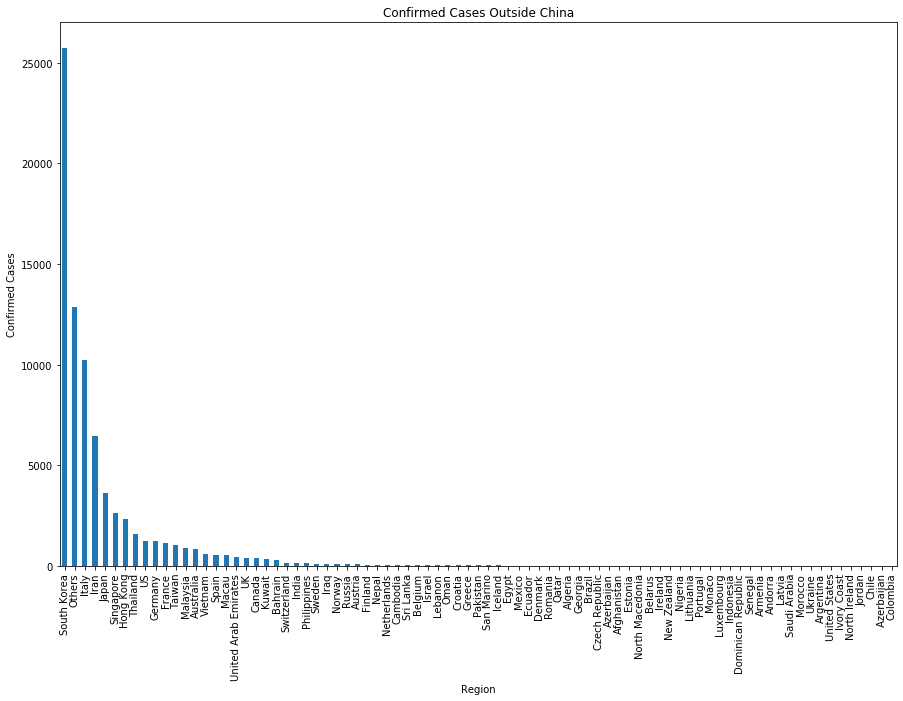

In [22]:
plt.figure(figsize=(15,10))
plt.title("Confirmed Cases Outside China")
plt.xlabel('Region')
plt.ylabel('Confirmed Cases')
data_region_confirmed.plot(kind = 'bar')

In [23]:
data['Date'].max()

Timestamp('2020-03-03 12:00:00')

In [24]:
data['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [25]:
data[data['Date'] == '2020-03-03 12:00:00']

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,2020-03-03 12:00:00,Hubei,Mainland China,2020-03-03 11:43:02,67217,2835,36208,30.9756,112.2707
1,2020-03-03 12:00:00,NaN,South Korea,2020-03-03 09:43:02,5186,28,30,36.0000,128.0000
2,2020-03-03 12:00:00,NaN,Italy,2020-03-03 20:03:06,2502,79,160,43.0000,12.0000
3,2020-03-03 12:00:00,NaN,Iran,2020-03-03 14:23:03,2336,77,291,32.0000,53.0000
4,2020-03-03 12:00:00,Guangdong,Mainland China,2020-03-03 10:23:10,1350,7,1101,23.3417,113.4244
...,...,...,...,...,...,...,...,...,...
146,2020-03-03 12:00:00,NaN,Ukraine,2020-03-03 15:33:02,1,0,0,48.3794,31.1656
147,2020-03-03 12:00:00,From Diamond Princess,Australia,2020-02-29 02:03:10,0,0,0,35.4437,139.6380
148,2020-03-03 12:00:00,"Lackland, TX (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,29.3829,-98.6134
149,2020-03-03 12:00:00,"Omaha, NE (From Diamond Princess)",US,2020-02-24 23:33:02,0,0,0,41.2545,-95.9758


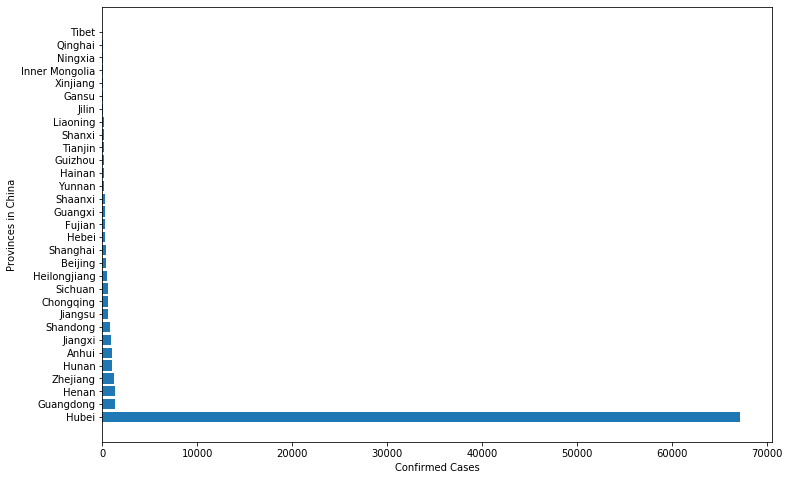

In [26]:
data_latest = data[data['Date'] == '2020-03-03 12:00:00']
data_latest_China = data_latest[data_latest['Region'] == 'Mainland China']
plt.figure(figsize=(12,8))
plt.barh(data_latest_China.Province, data_latest_China.Confirmed)
plt.xlabel('Confirmed Cases')
plt.ylabel('Provinces in China')
plt.show()

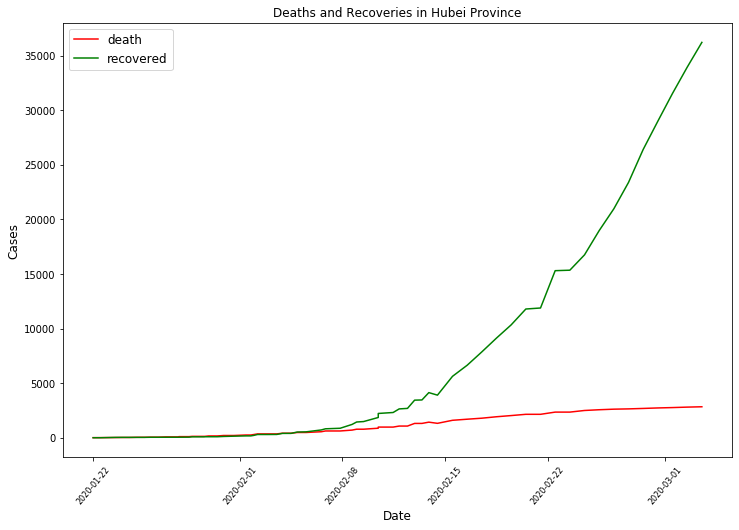

In [27]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(data[data['Province']=='Hubei'].Date,data[data['Province']=='Hubei'].Deaths,color='red')
plt.plot(data[data['Province']=='Hubei'].Date,data[data['Province']=='Hubei'].Recovered,color='green')
plt.legend(['death','recovered'],fontsize=12)
plt.title('Deaths and Recoveries in Hubei Province')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
plt.style.use('dark_background')
plt.show()

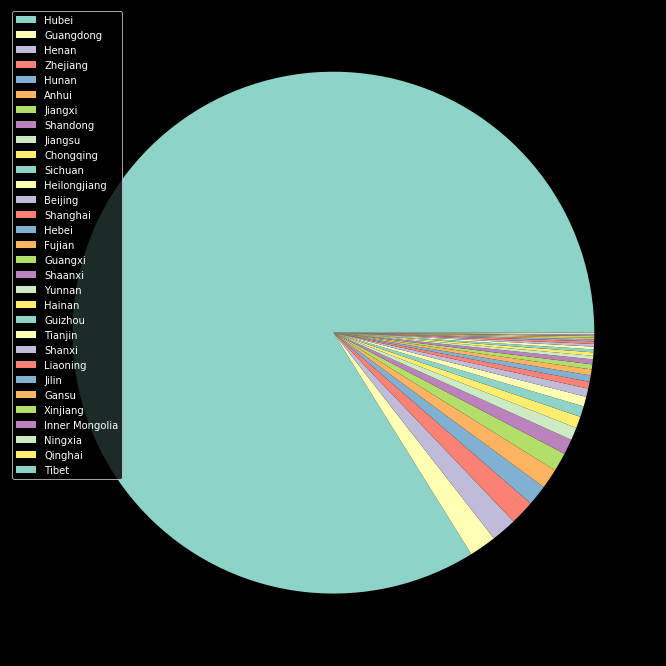

In [28]:
plt.figure(figsize = (12,12))
plt.pie(data_latest_China.Confirmed)
plt.legend(data_latest_China.Province, loc='best')
plt.style.use('dark_background')
plt.show()

In [29]:
data_outside_hubei = data[data['Province']!='Hubei']
grouped_data_outside_hubei = data_outside_hubei.groupby('Date').sum()
grouped_data_outside_hubei.head()

,Confirmed,Deaths,Recovered,Lat,Long
Date,,,,,
2020-01-22 00:00:00,62,0,0,0.0,0.0
2020-01-22 12:00:00,111,0,0,0.0,0.0
2020-01-23 12:00:00,209,1,2,0.0,0.0
2020-01-24 00:00:00,332,2,3,0.0,0.0
2020-01-24 12:00:00,392,2,5,0.0,0.0


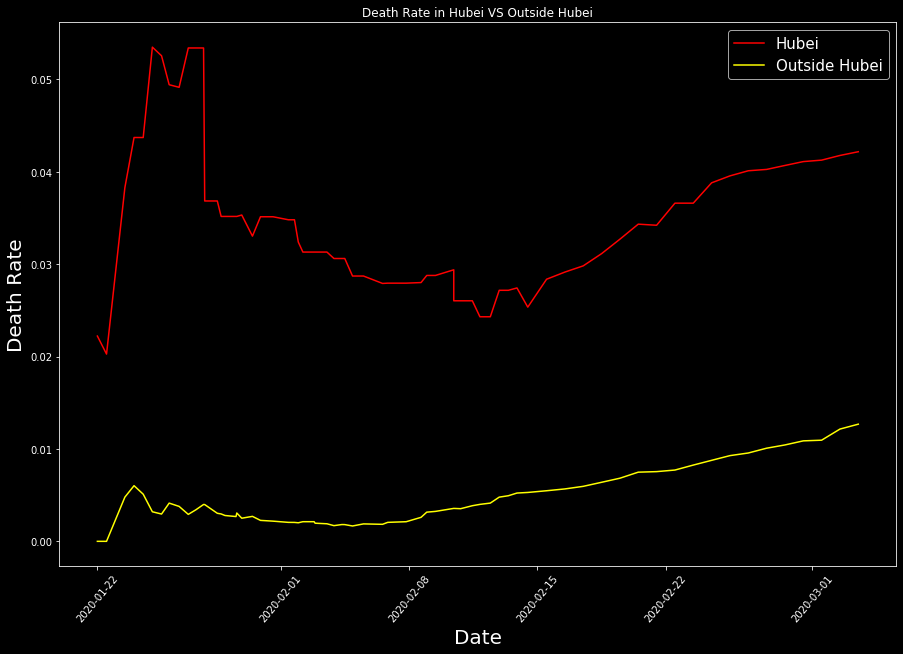

In [30]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=50,size=10)
plt.plot(data[data['Province']=='Hubei'].Date,data[data['Province']=='Hubei'].Deaths/data[data['Province']=='Hubei'].Confirmed,color='red')
plt.plot(grouped_data_outside_hubei['Deaths']/grouped_data_outside_hubei['Confirmed'],color='yellow')
plt.title('Death Rate in Hubei VS Outside Hubei')
plt.xlabel('Date',size=20)
plt.ylabel('Death Rate',size=20)
plt.legend(['Hubei','Outside Hubei'],fontsize=15)
plt.show()

### We can get the conclusion that the death rate inside Hubei is significant higher than than other provinces.

There might be three possible reasons:

- After isolation of several major cities in Hubei province, there is a significant lack of medical resources, and people suffer from great anxieties which causes the high death rate.
- The toxicity of the virus has reduced after it spreads outside Huber province.
- The number of mild patients in Hubei Province is severely underestimated。